#### [머신러닝] 독버섯 분류
- 데이터셋  : mushrooms.csv

- 알고리즘 : 지도학습>분류 => LogisticRegression, DecisionTreeClassifier, VotingClassifier

- 3개 알고리즘으로 구현 후 성능 비교

In [45]:
# 모듈 로딩
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split

In [46]:
# 데이터 준비
mushroomsDF=pd.read_csv('../data/mushrooms.csv')
mushroomsDF

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [47]:
mushroomsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [48]:
# 중복 확인
mushroomsDF.duplicated().sum()

0

In [49]:
# 컬럼별 고유값 확인
for i in range(23):
    print(mushroomsDF.columns[i],":", mushroomsDF.iloc[:,i].unique())

class : ['p' 'e']
cap-shape : ['x' 'b' 's' 'f' 'k' 'c']
cap-surface : ['s' 'y' 'f' 'g']
cap-color : ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises : ['t' 'f']
odor : ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment : ['f' 'a']
gill-spacing : ['c' 'w']
gill-size : ['n' 'b']
gill-color : ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape : ['e' 't']
stalk-root : ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring : ['s' 'f' 'k' 'y']
stalk-surface-below-ring : ['s' 'f' 'y' 'k']
stalk-color-above-ring : ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring : ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type : ['p']
veil-color : ['w' 'n' 'o' 'y']
ring-number : ['o' 't' 'n']
ring-type : ['p' 'e' 'l' 'f' 'n']
spore-print-color : ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population : ['s' 'n' 'a' 'v' 'y' 'c']
habitat : ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [50]:
#'veil-type' drop
mushroomsDF.drop('veil-type',axis=1)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,s,o,o,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,s,o,o,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,s,o,o,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,s,k,w,w,w,o,e,w,v,l


In [51]:
# '?' 확인
mushroomsDF[mushroomsDF['stalk-root']=='?']

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
3984,e,x,y,b,t,n,f,c,b,e,...,s,e,w,p,w,t,e,w,c,w
4023,p,x,y,e,f,y,f,c,n,b,...,s,w,w,p,w,o,e,w,v,p
4076,e,f,y,u,f,n,f,c,n,h,...,f,w,w,p,w,o,f,h,y,d
4100,p,x,y,e,f,y,f,c,n,b,...,s,p,p,p,w,o,e,w,v,d
4104,p,x,y,n,f,f,f,c,n,b,...,s,p,p,p,w,o,e,w,v,l
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [52]:
mushroomsDF

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [53]:
#피쳐와 타겟 분리
featureDF=mushroomsDF.drop(columns='class')
targetSR=mushroomsDF['class']

In [54]:
# get_dummies를 사용하여 범주형 변수를 더미 변수로 변환

featureDF=pd.get_dummies(featureDF)

featureDF.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,False,True,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,True,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False


In [55]:
# 타겟 0,1로 변환
targetSR=targetSR.replace('e',1)
targetSR=targetSR.replace('p',0)

targetSR.head()

0    0
1    1
2    1
3    0
4    1
Name: class, dtype: int64

In [56]:
# 학습용 데이터셋 준비
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR,
                                                    random_state=10,
                                                    stratify=targetSR)

### DecisionTreeClassifier

In [57]:
print(f'X_train: {X_train.shape}, {X_train.ndim}D')
print(f'X_test: {X_test.shape}, {X_test.ndim}D')

print(f'y_train: {y_train.shape}, {y_train.ndim}D')
print(f'y_test: {y_test.shape}, {y_test.ndim}D')

X_train: (6093, 117), 2D
X_test: (2031, 117), 2D
y_train: (6093,), 1D
y_test: (2031,), 1D


- 학습

In [58]:
# 모델 인스턴스
dt_model = DecisionTreeClassifier(random_state=1)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [59]:
# 모델 파라미터 : 학습 fit() 후에 학습용 데이터셋을 기반으로 설정된 값들
print(f'[dt_model.classes_] {dt_model.classes_}')
print(f'[dt_model.n_classes_] {dt_model.n_classes_}개')
print(f'[dt_model.max_features_] {dt_model.max_features_}개') #아무값도 안주었기 때문에 원래 피쳐 갯수 전부인 4개 
print(f'[dt_model.feature_names_in_] {dt_model.feature_names_in_}개')
print(f'[dt_model.feature_importances_] {dt_model.feature_importances_}')

[dt_model.classes_] [0 1]
[dt_model.n_classes_] 2개
[dt_model.max_features_] 117개
[dt_model.feature_names_in_] ['cap-shape_b' 'cap-shape_c' 'cap-shape_f' 'cap-shape_k' 'cap-shape_s'
 'cap-shape_x' 'cap-surface_f' 'cap-surface_g' 'cap-surface_s'
 'cap-surface_y' 'cap-color_b' 'cap-color_c' 'cap-color_e' 'cap-color_g'
 'cap-color_n' 'cap-color_p' 'cap-color_r' 'cap-color_u' 'cap-color_w'
 'cap-color_y' 'bruises_f' 'bruises_t' 'odor_a' 'odor_c' 'odor_f' 'odor_l'
 'odor_m' 'odor_n' 'odor_p' 'odor_s' 'odor_y' 'gill-attachment_a'
 'gill-attachment_f' 'gill-spacing_c' 'gill-spacing_w' 'gill-size_b'
 'gill-size_n' 'gill-color_b' 'gill-color_e' 'gill-color_g' 'gill-color_h'
 'gill-color_k' 'gill-color_n' 'gill-color_o' 'gill-color_p'
 'gill-color_r' 'gill-color_u' 'gill-color_w' 'gill-color_y'
 'stalk-shape_e' 'stalk-shape_t' 'stalk-root_?' 'stalk-root_b'
 'stalk-root_c' 'stalk-root_e' 'stalk-root_r' 'stalk-surface-above-ring_f'
 'stalk-surface-above-ring_k' 'stalk-surface-above-ring_s'
 'stalk-

- 성능체크

In [60]:
# 학습용 데이터셋에 대한 성능
train_score=dt_model.score(X_train, y_train)

# 테스트 데이터셋에 대한 성능
test_score=dt_model.score(X_test, y_test)

print(f'train_score : {train_score}, test_score : {test_score}')

train_score : 1.0, test_score : 1.0


- 교차 검증

In [61]:
from sklearn.model_selection import StratifiedKFold, cross_validate

In [62]:
# 교차 검증 준비 => 모델 인스턴스, trainDS, cv=5 (기본값)
dt_model2 = DecisionTreeClassifier(random_state=1)
result=cross_validate(dt_model2,X_train, y_train,
               return_train_score=True, 
               return_estimator=True)

In [63]:
# dict => DataFrame
resultDF=pd.DataFrame(result)

In [64]:
resultDF

,fit_time,score_time,estimator,test_score,train_score
0,0.015955,0.001993,DecisionTreeClassifier(random_state=1),1.0,1.0
1,0.014020,0.001995,DecisionTreeClassifier(random_state=1),1.0,1.0
2,0.015937,0.002990,DecisionTreeClassifier(random_state=1),1.0,1.0
3,0.015876,0.003058,DecisionTreeClassifier(random_state=1),1.0,1.0
4,0.015014,0.002949,DecisionTreeClassifier(random_state=1),1.0,1.0


[5] 성능 향상 위한 튜닝 ==>  하이터 파라미터 Hyper-parameter 설정

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
# 하이퍼파라미터 dict 생성
params= {'max_depth':[4,3,2,1],
         'min_samples_leaf':[7,6,5]}

In [67]:
gscv=GridSearchCV(DecisionTreeClassifier(), param_grid=params, refit=True, return_train_score=True)
gscv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 3, 2, 1],
                         'min_samples_leaf': [7, 6, 5]},
             return_train_score=True)

In [68]:
# 모델 파라미터
print(f'[gscv.best_params]       {gscv.best_params_}')
print(f'[gscv.best_score_]      {gscv.best_score_}')
print(f'[gscv.best_estimator_]  {gscv.best_estimator_}')
print(f'[gscv.cv_results_] \n {gscv.cv_results_}')

cv_resultDF=pd.DataFrame(gscv.cv_results_)

[gscv.best_params]       {'max_depth': 4, 'min_samples_leaf': 7}
[gscv.best_score_]      0.9875273953319835
[gscv.best_estimator_]  DecisionTreeClassifier(max_depth=4, min_samples_leaf=7)
[gscv.cv_results_] 
 {'mean_fit_time': array([0.01355071, 0.01155462, 0.01197133, 0.01017351, 0.01025004,
       0.01054506, 0.00813971, 0.00898542, 0.00875354, 0.00717559,
       0.00711617, 0.00759292]), 'std_fit_time': array([2.34599285e-03, 4.81881464e-04, 5.70560318e-05, 4.30689326e-04,
       4.22717806e-04, 4.85971097e-04, 3.76539606e-04, 2.76658437e-05,
       7.38216475e-04, 3.98922337e-04, 3.68721393e-04, 5.00448355e-04]), 'mean_score_time': array([0.00283322, 0.00257773, 0.00222054, 0.00258503, 0.0026052 ,
       0.00242043, 0.0024086 , 0.00259595, 0.00239244, 0.00225406,
       0.00230784, 0.00196719]), 'std_score_time': array([4.22214104e-04, 5.02267801e-04, 4.21598415e-04, 4.87650631e-04,
       4.99657929e-04, 4.72821084e-04, 5.09067933e-04, 4.79135871e-04,
       4.88305175e-04, 5.2092

In [69]:
cv_resultDF.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [70]:
cv_resultDF[['params','mean_test_score','mean_train_score']]

,params,mean_test_score,mean_train_score
0,"{'max_depth': 4, 'min_samples_leaf': 7}",0.987527,0.990932
1,"{'max_depth': 4, 'min_samples_leaf': 6}",0.987527,0.990932
2,"{'max_depth': 4, 'min_samples_leaf': 5}",0.987527,0.990932
3,"{'max_depth': 3, 'min_samples_leaf': 7}",0.983916,0.984449
4,"{'max_depth': 3, 'min_samples_leaf': 6}",0.983916,0.984449
5,"{'max_depth': 3, 'min_samples_leaf': 5}",0.983916,0.984449
6,"{'max_depth': 2, 'min_samples_leaf': 7}",0.953388,0.953389
7,"{'max_depth': 2, 'min_samples_leaf': 6}",0.953388,0.953389
8,"{'max_depth': 2, 'min_samples_leaf': 5}",0.953388,0.953389
9,"{'max_depth': 1, 'min_samples_leaf': 7}",0.885113,0.885114


In [71]:
diffscoreDF=cv_resultDF[['mean_test_score','mean_train_score']].copy()
diffscoreDF['diff']=cv_resultDF['mean_train_score']-cv_resultDF['mean_test_score']

In [72]:
cv_resultDF[['params','mean_test_score','mean_train_score']]

,params,mean_test_score,mean_train_score
0,"{'max_depth': 4, 'min_samples_leaf': 7}",0.987527,0.990932
1,"{'max_depth': 4, 'min_samples_leaf': 6}",0.987527,0.990932
2,"{'max_depth': 4, 'min_samples_leaf': 5}",0.987527,0.990932
3,"{'max_depth': 3, 'min_samples_leaf': 7}",0.983916,0.984449
4,"{'max_depth': 3, 'min_samples_leaf': 6}",0.983916,0.984449
5,"{'max_depth': 3, 'min_samples_leaf': 5}",0.983916,0.984449
6,"{'max_depth': 2, 'min_samples_leaf': 7}",0.953388,0.953389
7,"{'max_depth': 2, 'min_samples_leaf': 6}",0.953388,0.953389
8,"{'max_depth': 2, 'min_samples_leaf': 5}",0.953388,0.953389
9,"{'max_depth': 1, 'min_samples_leaf': 7}",0.885113,0.885114


In [73]:
## 가장 좋은 모델
best_model=gscv.best_estimator_
print(f'best_model.max_depth : {best_model.max_depth}')
print(f'best_model.min_samples_leaf : {best_model.min_samples_leaf}')

best_model.max_depth : 4
best_model.min_samples_leaf : 7


In [74]:
# 피쳐 중요도 및 개수
best_model.feature_importances_, best_model.n_features_in_, best_model.feature_names_in_

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 2.47351412e-02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.30667350e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.58727631e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.85186635e-01, 0.00000000e+00, 0.000000

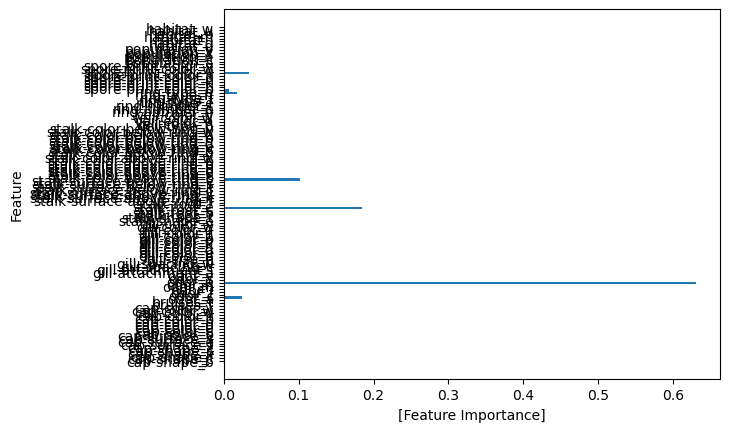

In [75]:
plt.barh(range(best_model.n_features_in_), best_model.feature_importances_, align='center')
plt.yticks(np.arange(best_model.n_features_in_), best_model.feature_names_in_)
plt.xlabel("[Feature Importance]")
plt.ylabel("Feature")
plt.show()

In [76]:
# 특성 중요도와 특성 이름을 가져옵니다
importances = best_model.feature_importances_
feature_names = best_model.feature_names_in_

# 중요도를 기준으로 인덱스를 정렬합니다
indices = np.argsort(importances)[::-1]

# 상위 5개의 인덱스를 가져옵니다
top_indices = indices[:5]

# 상위 5개의 중요도와 특성 이름을 추출합니다
top_importances = importances[top_indices]
top_feature_names = [feature_names[i] for i in top_indices]


In [77]:
ff=pd.DataFrame()
ff['name']=best_model.feature_names_in_
ff['importance']=best_model.feature_importances_

In [78]:
from sklearn.tree import export_graphviz

export_graphviz(best_model, out_file='mush_hw_tree.dot', 
                class_names=['p', 'e'],
                feature_names=best_model.feature_names_in_, 
                impurity=True, filled=True, rounded=True)

In [79]:
ff.sort_values(by=['importance'], inplace=True)
ff

,name,importance
0,cap-shape_b,0.000000
82,veil-type_p,0.000000
81,stalk-color-below-ring_y,0.000000
80,stalk-color-below-ring_w,0.000000
79,stalk-color-below-ring_p,0.000000
...,...,...
22,odor_a,0.024735
100,spore-print-color_r,0.033504
63,stalk-surface-below-ring_y,0.102175
53,stalk-root_c,0.185187


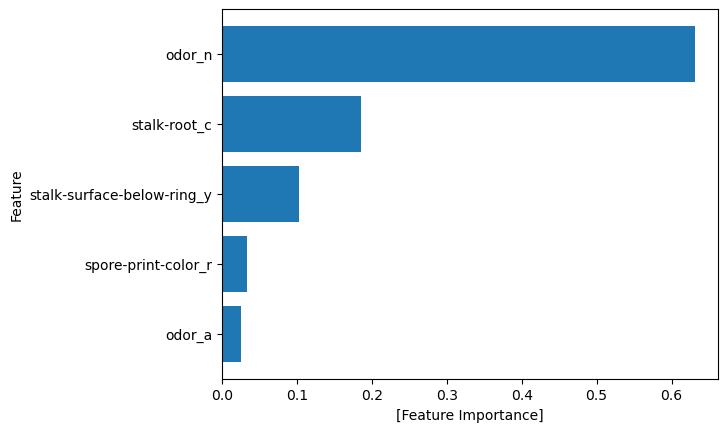

In [80]:
plt.barh(ff.name[-5:], ff.importance[-5:], align='center')
plt.xlabel("[Feature Importance]")
plt.ylabel("Feature")
plt.show()

In [81]:
from sklearn.tree import export_graphviz

export_graphviz(best_model, out_file='mushrooms.dot', 
                class_names=['p', 'e'],
                feature_names=best_model.feature_names_in_, 
                impurity=True, filled=True, rounded=True)

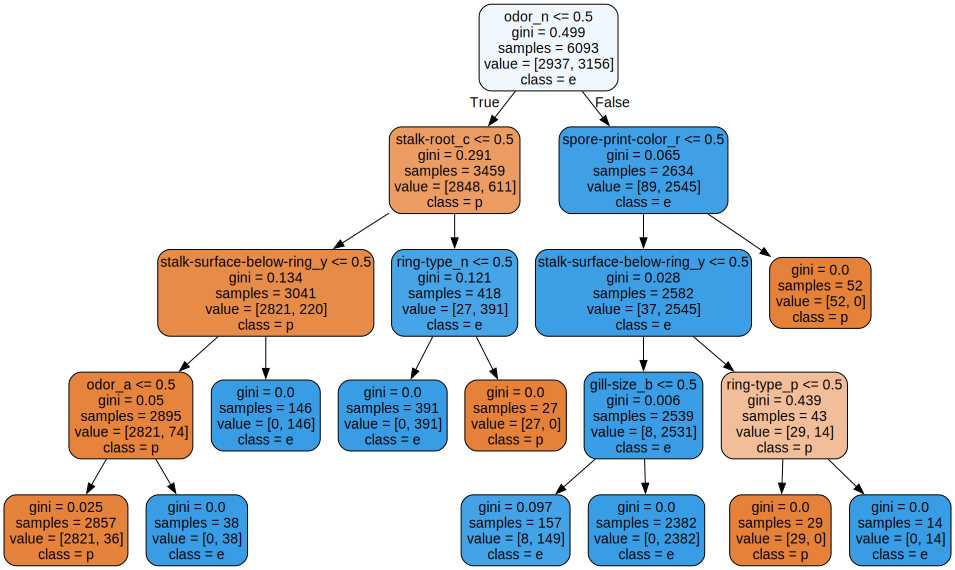

In [82]:
import graphviz

with open('mushrooms.dot') as f:
    dot_data=f.read()

graphviz.Source(dot_data)